# FN Reduction using Random Forest (Medical Classification)

This notebook replaces the Neural Network with a **Random Forest** model, focusing **only** on reducing False Negatives (FN).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight


## Load Data

In [6]:
df = pd.read_csv("hospital_deterioration_hourly_panel.csv")

# Remove rows with missing target (y)
df = df.dropna(subset=[df.columns[-1]])

X = df.iloc[:, :-1]
y = df.iloc[:, -1]


## Train / Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

## Class Weights

In [21]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(enumerate(class_weights))
print('Class Weights:', class_weight_dict)

Class Weights: {0: np.float64(0.5285733711549834), 1: np.float64(9.249405124232196)}


## Random Forest Model

In [22]:
rf = RandomForestClassifier(
    n_estimators=300,
    class_weight=class_weight_dict,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: np.float64(0.5285733711549834),
                                     1: np.float64(9.249405124232196)},
                       n_estimators=300, n_jobs=-1, random_state=42)

In [23]:
from sklearn.metrics import accuracy_score
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9930839734845766


## Prediction with Lower Threshold

In [24]:
THRESHOLD = 0.35

y_probs = rf.predict_proba(X_test)[:, 1]
y_pred = (y_probs >= THRESHOLD).astype(int)

## Confusion Matrix

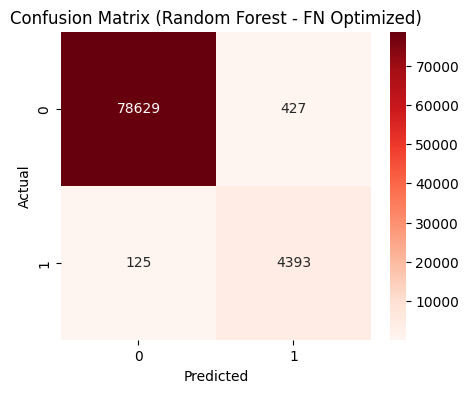

False Negatives: 125
True Positives: 4393


In [12]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest - FN Optimized)')
plt.show()

TN, FP, FN, TP = cm.ravel()
print('False Negatives:', FN)
print('True Positives:', TP)

## F1-score


In [18]:
print('F1-score:', f1_score(y_test, y_pred))


F1-score: 0.9336851766865535
